In [ ]:
import pandas as pd

# Define the path to your CSV file
OUT_PATH = "results/outputs/"
file_path = OUT_PATH + "train_scaled_standard.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify it loaded correctly
print(df.head())


   CustomerID       Age  AnnualIncome  LoanAmount  CreditScore  LoanTerm  \
0    1.509686  1.162913      0.575404    0.263515     1.311756 -0.038594   
1   -1.088578  1.162913     -0.972132    1.481561    -0.908587 -1.454272   
2    0.929966 -0.351333      0.859164   -0.560701    -0.959483 -0.038594   
3   -0.508857 -1.404721      0.341710   -1.201589    -0.940397 -0.746433   
4   -0.418058 -1.009701      0.782424   -0.096305    -1.684753 -1.454272   

   ExistingDebt  Default  
0      0.726806        0  
1     -0.111738        1  
2     -0.163955        1  
3     -0.572675        1  
4     -0.988611        1  


Creating histograms for all features...


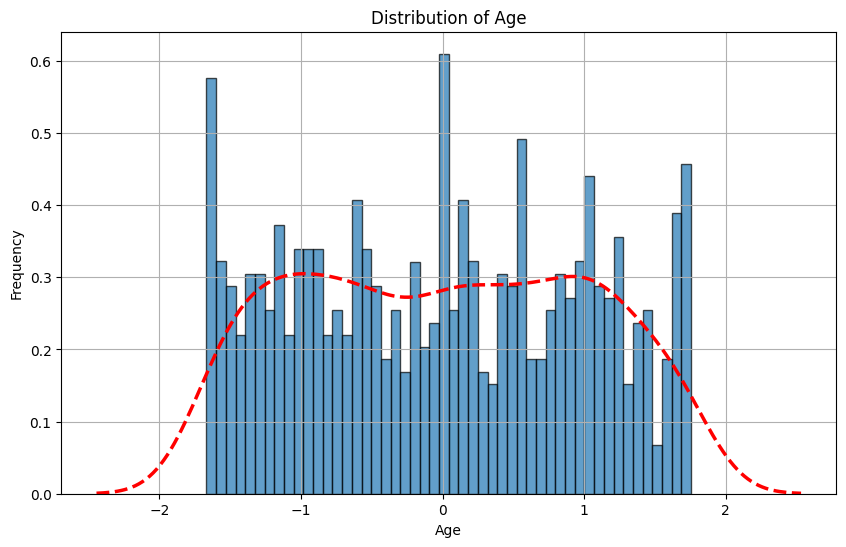

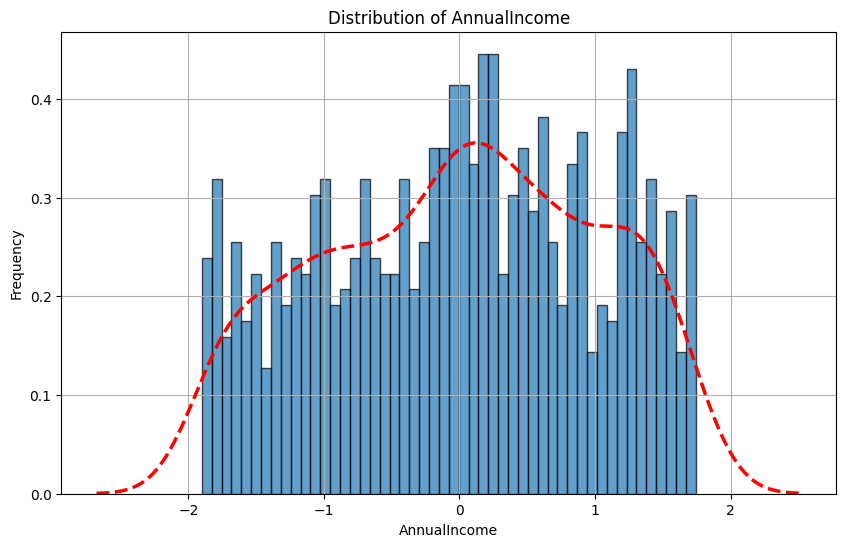

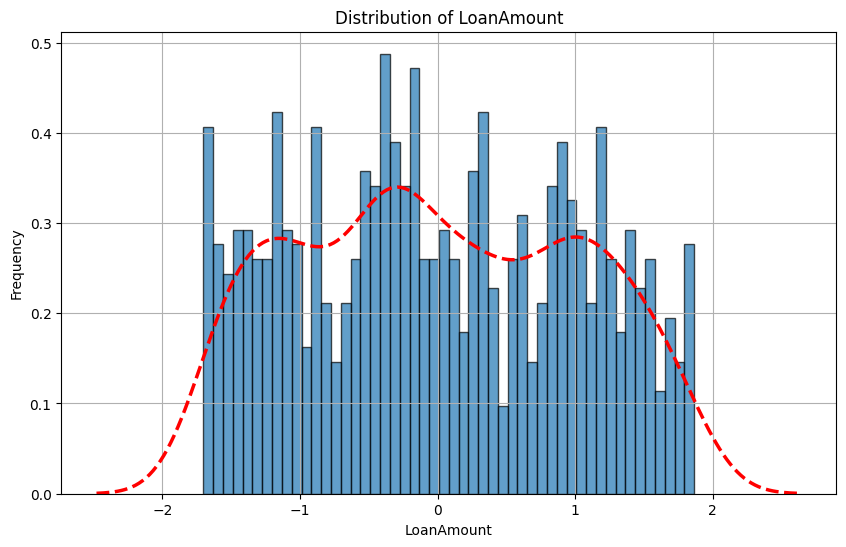

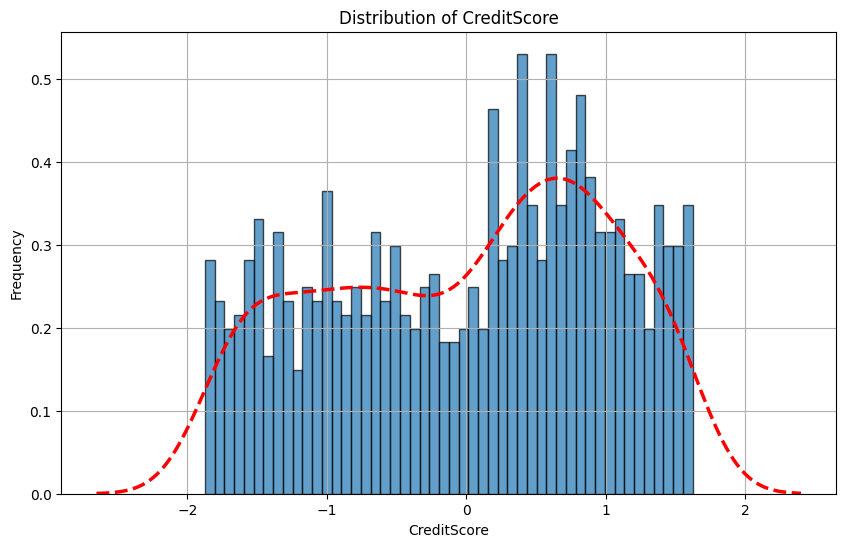

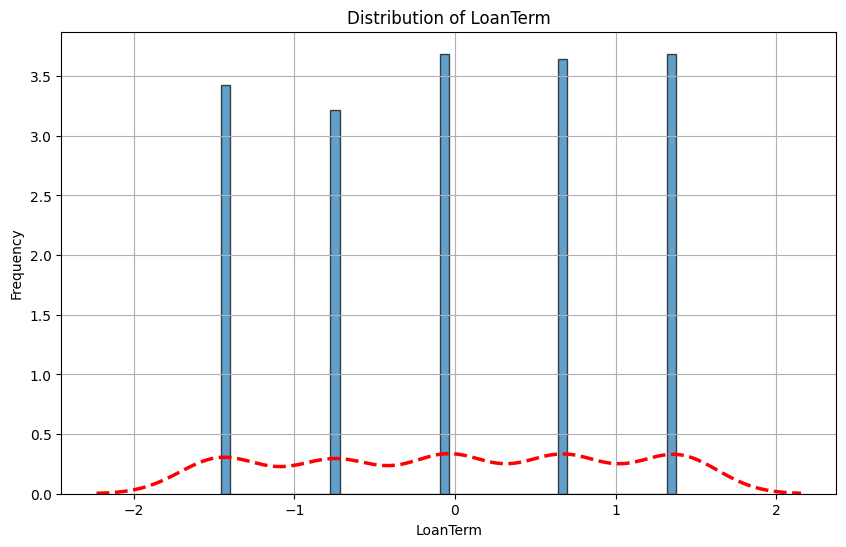

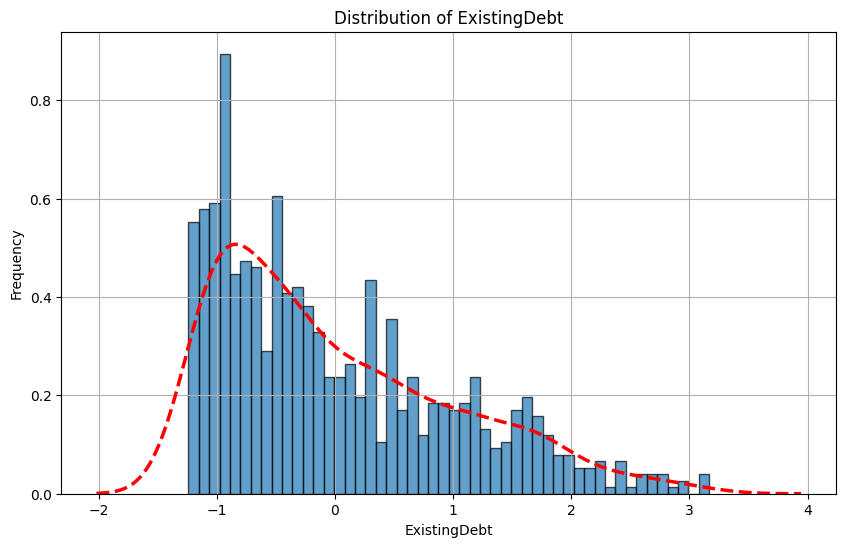

All histograms have been generated and saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Identify all numerical columns to plot
features_to_plot = df.select_dtypes(include=np.number).columns.tolist()
# Exclude the 'CustomerID' and 'Default' columns
features_to_plot.remove('CustomerID')
features_to_plot.remove('Default')

print("Creating histograms for all features...")

# Loop through each feature and create a histogram
for column in features_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df[column], color='red', linestyle='--', linewidth=2.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(f'{column}_histogram.png')
    plt.show()

print("All histograms have been generated and saved.")

Yeo-Johnson transform applied successfully to 'ExistingDebt'.


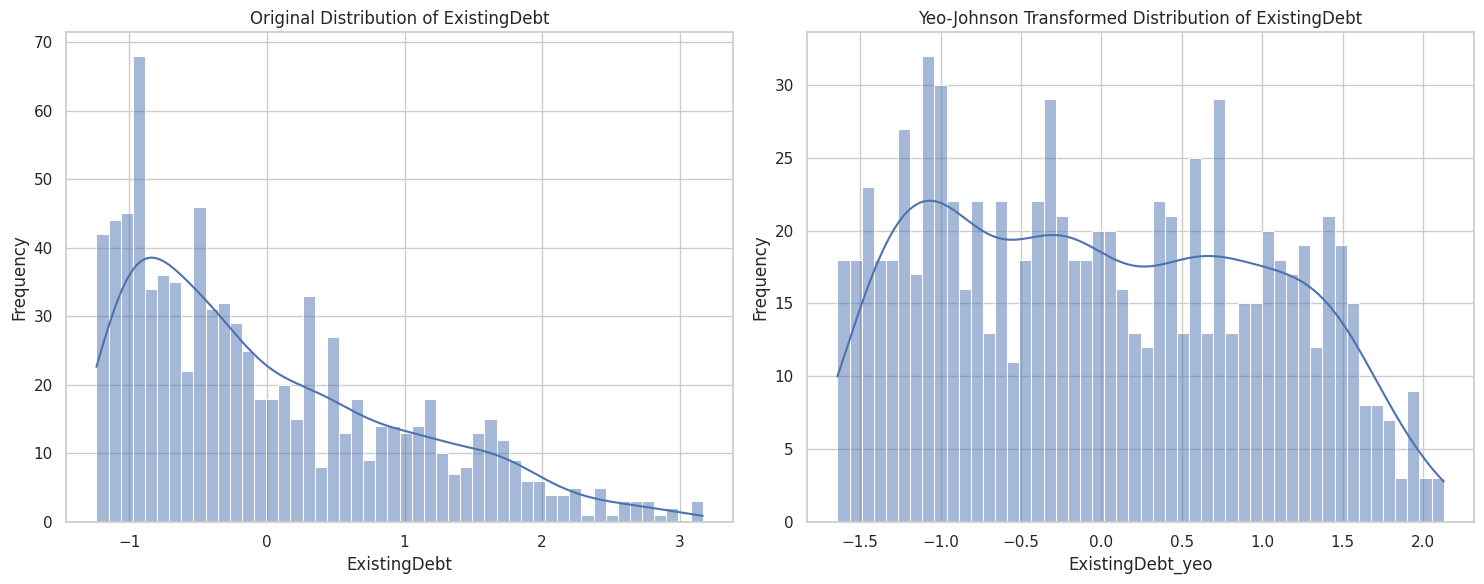


Comparison histogram for 'ExistingDebt' has been generated and saved.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns


#  Apply Yeo-Johnson Transform to 'ExistingDebt' ---

pt = PowerTransformer(method='yeo-johnson')
df['ExistingDebt_yeo'] = pt.fit_transform(df[['ExistingDebt']])

print("Yeo-Johnson transform applied successfully to 'ExistingDebt'.")

#  Compare Original vs. Transformed with Histograms
plt.figure(figsize=(15, 6))

# Plot original data histogram
plt.subplot(1, 2, 1)
sns.histplot(df['ExistingDebt'], bins=50, kde=True)
plt.title('Original Distribution of ExistingDebt')
plt.xlabel('ExistingDebt')
plt.ylabel('Frequency')

# Plot Yeo-Johnson transformed data histogram
plt.subplot(1, 2, 2)
sns.histplot(df['ExistingDebt_yeo'], bins=50, kde=True)
plt.title('Yeo-Johnson Transformed Distribution of ExistingDebt')
plt.xlabel('ExistingDebt_yeo')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('existing_debt_before_after_yeo.png')
plt.show()

print("\nComparison histogram for 'ExistingDebt' has been generated and saved.")



Applied equal-frequency binning to 'Age'.


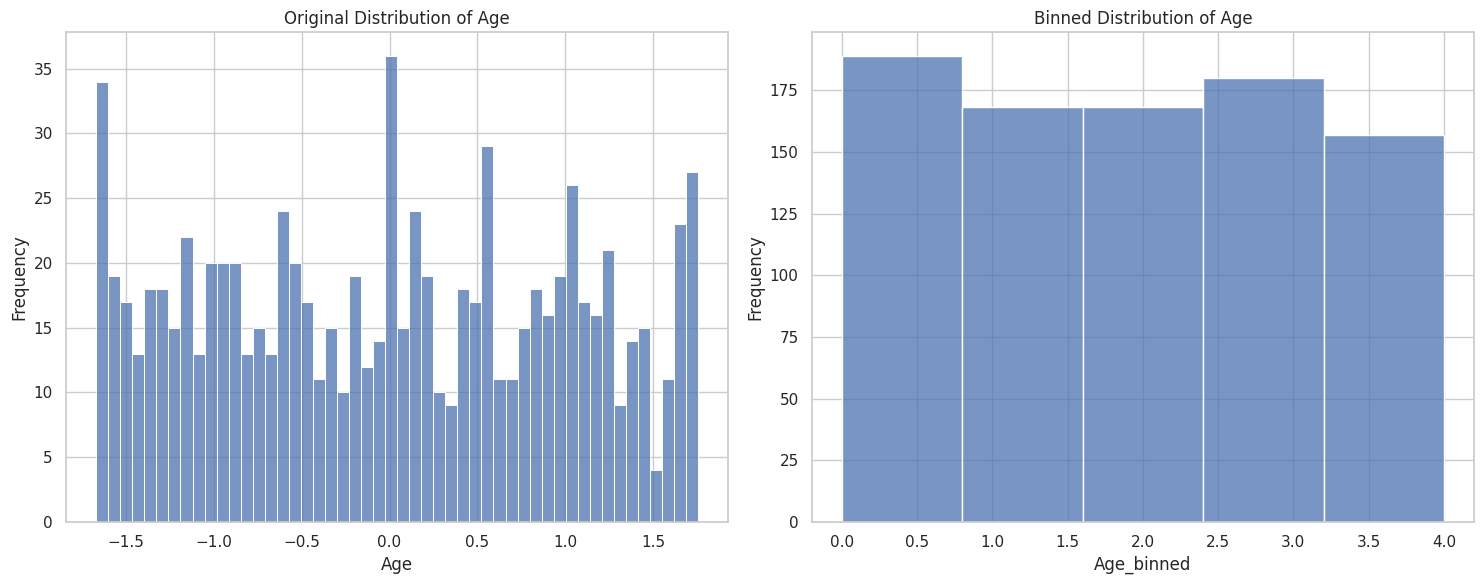


Comparison histograms for Age and the distribution for LoanTerm have been generated and saved.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Apply Binning to 'Age' Only
# Apply equal-frequency binning to the continuous 'Age' feature.
df['Age_binned'] = pd.qcut(df['Age'], q=5, labels=False, duplicates='drop')
print("Applied equal-frequency binning to 'Age'.")

# Generate and Save Histograms
# Plot 'Age' comparison
plt.figure(figsize=(15, 6))
# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=50, kde=False)
plt.title('Original Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Binned data histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Age_binned'], bins=len(df['Age_binned'].unique()), kde=False)
plt.title('Binned Distribution of Age')
plt.xlabel('Age_binned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Age_before_after_binning.png')
plt.show()


print("\nComparison histograms for Age and the distribution for LoanTerm have been generated and saved.")

In [ ]:
# Create Ratio Features ---
df['DebtToIncomeRatio'] = df['ExistingDebt'] / (df['AnnualIncome'] + 1e-6)
print("Created 'DebtToIncomeRatio' feature.")

# creates the Loan Amount-to-Income Ratio.
df['LoanAmountToIncomeRatio'] = df['LoanAmount'] / (df['AnnualIncome'] + 1e-6)
print("Created 'LoanAmountToIncomeRatio' feature.")

# creates the Existing Debt-to-Loan Amount Ratio.
df['ExistingDebtToLoanAmountRatio'] = df['ExistingDebt'] / (df['LoanAmount'] + 1e-6)
print("Created 'ExistingDebtToLoanAmountRatio' feature.")


#  Display and Save the Result
print("\nOriginal vs. Ratio Features:")
print(df[['ExistingDebt', 'AnnualIncome', 'LoanAmount', 'DebtToIncomeRatio', 'LoanAmountToIncomeRatio', 'ExistingDebtToLoanAmountRatio']].head())

Created 'DebtToIncomeRatio' feature.
Created 'LoanAmountToIncomeRatio' feature.
Created 'ExistingDebtToLoanAmountRatio' feature.

Original vs. Ratio Features:
   ExistingDebt  AnnualIncome  LoanAmount  DebtToIncomeRatio  \
0      0.726806      0.575404    0.263515           1.263121   
1     -0.111738     -0.972132    1.481561           0.114941   
2     -0.163955      0.859164   -0.560701          -0.190831   
3     -0.572675      0.341710   -1.201589          -1.675904   
4     -0.988611      0.782424   -0.096305          -1.263521   

   LoanAmountToIncomeRatio  ExistingDebtToLoanAmountRatio  
0                 0.457963                       2.758116  
1                -1.524034                      -0.075419  
2                -0.652611                       0.292412  
3                -3.516386                       0.476599  
4                -0.123085                      10.265531  


In [ ]:
df.head()




,CustomerID,Age,AnnualIncome,LoanAmount,CreditScore,LoanTerm,ExistingDebt,Default,Age_binned,DebtToIncomeRatio,LoanAmountToIncomeRatio,ExistingDebtToLoanAmountRatio,ExistingDebt_yeo
0,1.509686,1.162913,0.575404,0.263515,1.311756,-0.038594,0.726806,0,4,1.263121,0.457963,2.758116,0.903554
1,-1.088578,1.162913,-0.972132,1.481561,-0.908587,-1.454272,-0.111738,1,4,0.114941,-1.524034,-0.075419,0.145040
2,0.929966,-0.351333,0.859164,-0.560701,-0.959483,-0.038594,-0.163955,1,1,-0.190831,-0.652611,0.292412,0.082921
3,-0.508857,-1.404721,0.341710,-1.201589,-0.940397,-0.746433,-0.572675,1,0,-1.675904,-3.516386,0.476599,-0.474743
4,-0.418058,-1.009701,0.782424,-0.096305,-1.684753,-1.454272,-0.988611,1,0,-1.263521,-0.123085,10.265531,-1.165849


Performing correlation analysis...

Correlation of each feature with the 'Default' target:
Default                          1.000000
ExistingDebt                     0.094589
DebtToIncomeRatio                0.070885
ExistingDebt_yeo                 0.067983
Age                              0.059268
Age_binned                       0.058979
LoanAmount                       0.043130
ExistingDebtToLoanAmountRatio    0.030420
LoanTerm                        -0.020529
LoanAmountToIncomeRatio         -0.047344
AnnualIncome                    -0.129162
CreditScore                     -0.804522
Name: Default, dtype: float64


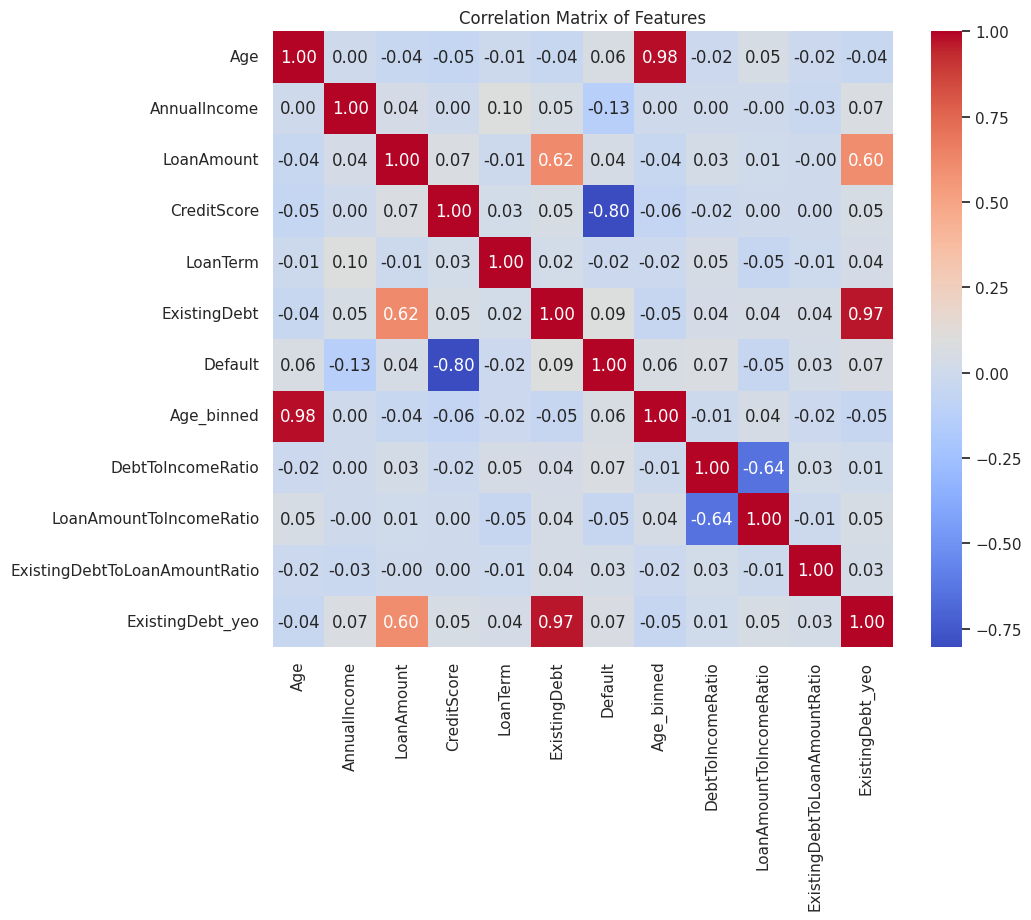

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Identify Features and Target ---
numerical_df = df.select_dtypes(include=np.number).drop(columns=['CustomerID'])
print("Performing correlation analysis...")

#  Calculate and Display Correlations with the Target
target_correlations = numerical_df.corr()['Default'].sort_values(ascending=False)
print("\nCorrelation of each feature with the 'Default' target:")
print(target_correlations)

#  Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png')
plt.show()



Data prepared for model training.
Random Forest model trained successfully.

--- Feature Importances Ranking ---
CreditScore                      0.797166
AnnualIncome                     0.042871
ExistingDebt_yeo                 0.034568
ExistingDebt                     0.031351
DebtToIncomeRatio                0.024850
LoanAmountToIncomeRatio          0.023095
LoanAmount                       0.014163
ExistingDebtToLoanAmountRatio    0.013250
Age                              0.009993
LoanTerm                         0.005248
Age_binned                       0.003445
dtype: float64


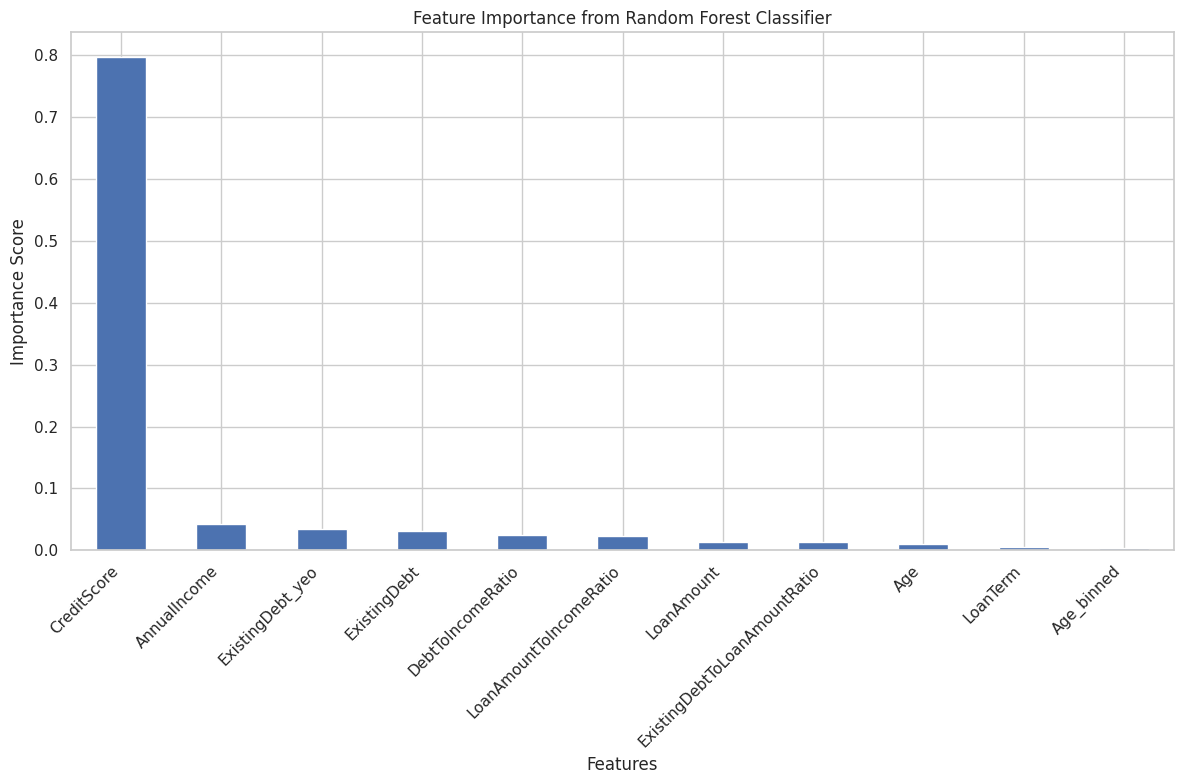

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


#   Prepare the Data (Features and Target)
X = df.drop(columns=['CustomerID', 'Default'])
y = df['Default']

print("Data prepared for model training.")

#  Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
print("Random Forest model trained successfully.")

#  Get and Display Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("\n--- Feature Importances Ranking ---")
print(sorted_importances)

# Visualize the Results
plt.figure(figsize=(12, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest Classifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Define and Select Final Features
features_to_keep = [
    'CreditScore',
    'LoanAmountToIncomeRatio',
    'AnnualIncome',
    'ExistingDebt',
    'ExistingDebt_yeo',
    'DebtToIncomeRatio',
    'Default'
]
print("\nSelected features to keep.")

# Create a new DataFrame with only the selected features
final_df = df[features_to_keep]
print("\nNew DataFrame created with only the selected features.")


#  Save the Final DataFrame to a CSV file
final_df.to_csv('final_dataset_selected_features.csv', index=False)
print("\nFinal dataset with 7 selected features saved as 'final_dataset_selected_features.csv'.")

final_df.head()


Selected features to keep.

New DataFrame created with only the selected features.

Final dataset with 7 selected features saved as 'final_dataset_selected_features.csv'.


,CreditScore,LoanAmountToIncomeRatio,AnnualIncome,ExistingDebt,ExistingDebt_yeo,DebtToIncomeRatio,Default
0,1.311756,0.457963,0.575404,0.726806,0.903554,1.263121,0
1,-0.908587,-1.524034,-0.972132,-0.111738,0.145040,0.114941,1
2,-0.959483,-0.652611,0.859164,-0.163955,0.082921,-0.190831,1
3,-0.940397,-3.516386,0.341710,-0.572675,-0.474743,-1.675904,1
4,-1.684753,-0.123085,0.782424,-0.988611,-1.165849,-1.263521,1
